# Financial and Demographic Distribution Analysis

---

**Welcome to my Financial and Demographic Analysis!**

The code below demonstrates how different data visualizations can provide insights into financial and demographic datasets. 

---

**Dataset Design and Details:**

The attached dataset is a hypothetical furniture store's gathered data which includes two months of customers and their generated sales for the business. The company has gathered metrics including customer IDs, ages, discounts, and December's and January's spending amounts per customer.

The key question for the attached dataset is the following: Does a discount positively impact the spending habits of customers by generating more sales?

The store wanted to improve their sales after their amount gained in December; consequently, they implemented a discount which would be given to every returning customer in January that was between 0-60% in increments of 5%. The spending results from January have the implemented discount rates. We will use the dataset and the subsequent data visualizations I have created to analyze the dataset and determine whether the furniture store's discounts helped increase their sales.

I use the following libraries to create and implement these figures: pandas, matplotlib.pyplot, seaborn, numpy, sklearn.linear_model, and statsmodels.api.

---

## Displaying the Dataset's Descriptive Statistics

In [2]:
#Importing Necessary Packages:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

#Setting Display Requirements for Packages:
pd.set_option('max_rows', 10) 
sns.set(color_codes = True) 

#Importing cvs File Data:
filename = 'PromoData2017 - Sheet1.csv'
data = pd.read_csv(filename)

#Printing Data and the Data's Descriptive Statistics:
data 
data.describe()

,Customer ID,Age,Discount,JanuarySpend,DecSpend
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000
mean,1205.000000,29.815276,16.320050,510.890399,562.051566
std,695.562722,10.211078,20.280961,330.234228,347.584326
min,1.000000,15.000000,0.000000,-839.135883,-641.233461
25%,603.000000,21.000000,0.000000,279.835312,308.047662
50%,1205.000000,28.000000,5.000000,474.904880,545.410236
75%,1807.000000,38.000000,35.000000,715.534643,760.133090
max,2409.000000,63.000000,60.000000,1899.542737,1586.474750


## Analyzing Consumer Age Brackets

---

Most of the furniture store's customers are between the ages of 15 and 30 given the frequency of customers in the corresponding bins of the following histogram.

---

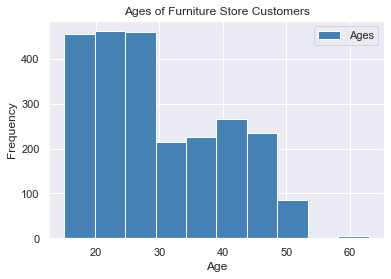

In [6]:
#Setting Data for Histogram:
y_one = data.iloc[:, 2]

#Assigning the Histogram Details:
plt.title("Ages of Furniture Store Customers")
plt.hist(y_one, bins = 10, label = "Ages", color = "steelblue", edgecolor = 'white') 
plt.xlabel("Age") 
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

#Printing the Histogram:
plt.show()

## Comparing Customer Spending in December and January

---

The furniture store implemented their randomized discounts in the January following their December sales to try to increase profits; consequently, the following comparative histograms were produced.

We observe December spending's tallest bin being in a lower dollar amount than January spending's tallest bin. Additionally, more spending is occuring between 250-1000 USD from the store's customers given the bins in this range are consistently taller or occasionally slightly shorter than their respective counterparts in the December spending category. Finally, the range of sales per customer increased drastically with some accounts dropping to 500 USD and some increasing significantly to 2000 USD. We can infer that the discounts prompted more customers to purchase more goods given the heights of the bins for January; however, a small subset of the discounts had very different price ranges which either resulted in a small net loss or significant produced gain.

---

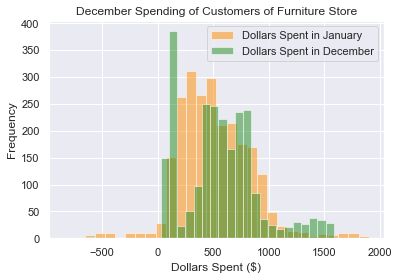

In [7]:
#Setting Data for Histogram:
y_one = data.iloc[:, 5]
y_two = data.iloc[:, 4]
y_three = data.iloc[:, 2]

#Assigning the Histogram Details:
plt.title("December Spending of Customers of Furniture Store")
plt.hist(y_two, bins = 30, label = "Dollars Spent in January", color = "darkorange", edgecolor = 'white', alpha = 0.5) 
plt.hist(y_one, bins = 30, label = "Dollars Spent in December", color = "forestgreen", edgecolor = 'white', alpha = 0.5)
plt.xlabel("Dollars Spent ($)") 
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

#Printing the Histogram:
plt.show()

## Regression Analysis of Age and Customer Spending in December

---

Age and customer spending in December have the highest correlation in their produced r-squared and adjusted r-squared values comparatively to any other pairing of variables in the dataset; they reach approximately 0.649 units. This statistic means that the degree to which these two metrics are related is estimated to be approximately 64.9%.

This measurable event depicts that age and customer spending in December are highly correlated, and we can infer that a witnessed improvement in spending would potentially and likely see a measurable change in age simultaneously.

To corroborate the interrelation between age and customer spending amounts, we will look at another regression analysis with age and customer spending in January.

---

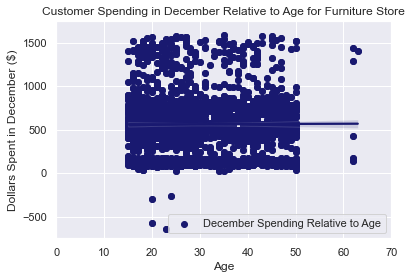

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               DecSpend   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              4450.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):                        0.00
Time:                        18:16:12   Log-Likelihood:                         -17800.
No. Observations:                2409   AIC:                                  3.560e+04
Df Residuals:                    2408   BIC:                                  3.561e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           16.8903      0.253     66.705      0.000      16.394      17.387
==============================================================================
Omnibus:                       73.454   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.775
Skew:                           0.428   Prob(JB):                     4.75e-18
Kurtosis:                       3.249   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Importing the Necessary Packages:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Setting Data for Regression Model:
x_one = data.iloc[:, 2]
y = data.iloc[:, 5]

#Assigning the Regression Model Details:
plt.scatter(x_one, y, label = 'December Spending Relative to Age', color = "midnightblue", marker = "o") 
plt.title('Customer Spending in December Relative to Age for Furniture Store') 
plt.legend()
plt.xlim(0, 70)
plt.ylim(-750, 1750)
plt.grid(True)

#Plotting the Least-Squares Line with Seaborn and Adding Axes Labels:
sns.regplot(x_one, y, color = "midnightblue", marker = "o")
plt.xlabel("Age")  
plt.ylabel("Dollars Spent in December ($)")

#Printing the Regression Model:
plt.show()

#Displaying Statistical Summary of Results:
results = sm.OLS(y,x_one).fit()
results.summary()

---

Additionally, we can see that there are very few outliers in the presented residual plot which means that the dataset and its produced metrics are reliable in representing the customers.

---

Text(0, 0.5, 'Dollars Spent in December ($)')

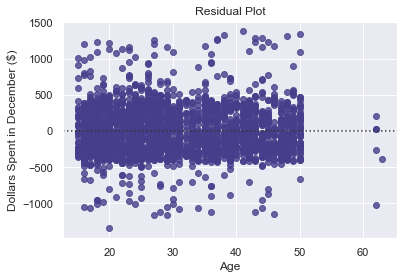

In [28]:
#Creating a Residual Plot:
sns.residplot(x = x_one, y = y, lowess = False, color = "darkslateblue")
plt.title('Residual Plot')
plt.xlabel("Age")  
plt.ylabel("Dollars Spent in December ($)")

## Regression Analysis of Age and Customer Spending in January

---

Age and customer spending in January produce the second-highest r-squared and adjusted r-squared values in the dataset between a pairing of variables at 0.635, meaning that the two variables are correlated at a degree which is approximately 63.5%. This endorses the hypothesis that age and customer spending are highly correlated.

---

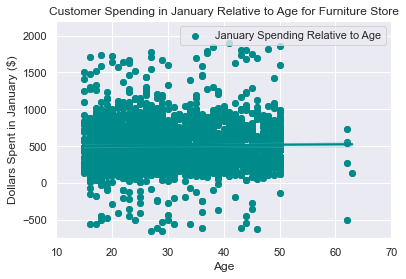

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           JanuarySpend   R-squared (uncentered):                   0.635
Model:                            OLS   Adj. R-squared (uncentered):              0.635
Method:                 Least Squares   F-statistic:                              4195.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):                        0.00
Time:                        18:21:39   Log-Likelihood:                         -17647.
No. Observations:                2409   AIC:                                  3.530e+04
Df Residuals:                    2408   BIC:                                  3.530e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           15.3847      0.238     64.766      0.000      14.919      15.850
==============================================================================
Omnibus:                       85.283   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.286
Skew:                           0.267   Prob(JB):                     4.25e-35
Kurtosis:                       4.136   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Setting Data for Regression Model:
x_one = data.iloc[:, 2]
y = data.iloc[:, 4] #- data.iloc[:, 5]

#Assigning the Regression Model Details:
plt.scatter(x_one, y, label = 'January Spending Relative to Age', color = "darkcyan", marker = "o") 
plt.title('Customer Spending in January Relative to Age for Furniture Store') 
plt.legend()
plt.xlim(10, 70)
plt.ylim(-750, 2200)
plt.grid(True)

#Plotting the Least-Squares Line with Seaborn and Adding Axes Labels:
sns.regplot(x_one, y, color = "darkcyan", marker = "o")
plt.xlabel("Age")  
plt.ylabel("Dollars Spent in January ($)")

#Printing the Regression Model:
plt.show()

#Displaying Statistical Summary of Results:
results = sm.OLS(y,x_one).fit()
results.summary()

---

Additionally, there are very few outliers in the subsequent residual plot which means that the dataset is reliably representing the customers and their spending habits.

---

Text(0, 0.5, 'Dollars Spent in January ($)')

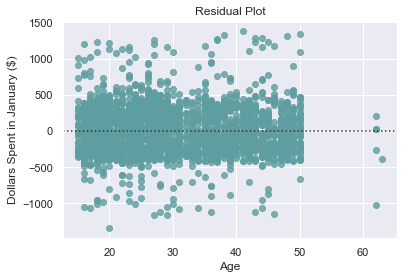

In [30]:
#Creating a Residual Plot:
sns.residplot(x = x_one, y = y, lowess = False, color = "cadetblue")
plt.title('Residual Plot')
plt.xlabel("Age")  
plt.ylabel("Dollars Spent in January ($)")

## Conclusion and Consequences

---

We can generate two conclusions from the observed visualizations:

(1) Discounts of different amounts encourage customers to increase their spending from approximately 50-100 USD to approximately 200-500 USD.

(2) Age and customer spending are highly correlated amongst the variables of interest.

Given discounts tend to impact customers' spending habits positively for the business by increasing their sales, we can conclusively determine that using these discounts actively improves income for the business. Moreover, we could advise the business to tailor their customer engagement strategies to specific age brackets to potentially increae their sales through strategies such as tailored advertising, memberships for age bracket needs (e.g., new home furniture membership for younger individuals/families), and/or increasing their stock of specific products for their age brackets. This financial analysis produces these actionable items which are privy to increasing profits from products and providing more idealistic experiences for customers through tailored approaches.

---

## Bibliography:

Looser, C.E. (2016). Furniture Discount Case. White Paper.
Retrieved from https://docs.google.com/document/d/1gy4eLRzWtS_PUH9qFoqCWafL2i3Koh2JQ3DSPkvrVnE/edit